In [1]:
#standard imports
import pandas as pd
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt

import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
%reload_ext autoreload
%autoreload 1
import pandas_profiling
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

display(HTML("<style>.container { width:100% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

#what to improve
# 1 Add yoy change in fastball drop
# 2 add career stats ie carrer IP and pitcher thrown along with any other data
# 3 player weight
# any other health information 
#add in minor league data

Please Note Analysis is further down in notebook

#https://library.fangraphs.com/pitching/complete-list-pitching/

In [3]:
#reading in injury data.  I think all nan rows need to be dropped as well as date column
injury = pd.read_csv('IL.csv')

In [4]:
injury.columns

Index(['Name', 'Unnamed: 1', 'Team', 'Injury Type', 'IL Type', 'Date', 'Days', 'IL Money', 'year'], dtype='object')

In [5]:
injury=injury.dropna(subset=['Name'])
injury=injury.drop(['Unnamed: 1','Date'],axis=1)

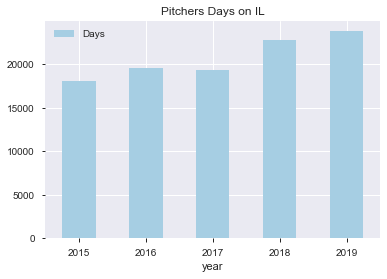

In [6]:
days_onIL=injury.groupby(['year']).sum()
days_onIL.reset_index()
days_onIL.plot.bar( rot=0,title='Pitchers Days on IL', colormap='Paired')

In [7]:
#all_that = pd.merge(result, injury, on=['Name', 'year'],how='left')
all_that=pd.read_csv('fastballvelo.csv')
y_begin=all_that[['playerid','year','vFA','FBv']]
#all_that=all_that.drop(['IP_y','ERA_y','BABIP_y','IP_x'],axis=1)

#all_that['FBv'] = all_that['FBv'].dropna()
#all_that['vFA'] = all_that['vFA'].dropna()

In [8]:
#all_that.to_csv('fastballvelo.csv')

In [9]:
# use pd.concat to join the new columns with your original dataframe
all_that = pd.concat([all_that,pd.get_dummies(all_that['Injury Type'])],axis=1)

# now drop the original 'country' column (you don't need it anymore)
all_that.drop(['Injury Type'],axis=1, inplace=True)

# use pd.concat to join the new columns with your original dataframe
all_that = pd.concat([all_that,pd.get_dummies(all_that['year'])],axis=1)


all_that['vFA_orig']=all_that['vFA']
all_that=all_that.drop(['IL Money','IL Type','Name','FBv','Team','vCU','vFA','vFC','vFS','vKN','vSB','vSI'],axis=1)

#not doing this as a loop in case so i cant evaluate each going forward
all_that['CB%'] = all_that['CB%'].fillna(0)
all_that['CBv'] = all_that['CBv'].fillna(0)
all_that['CH%'] = all_that['CH%'].fillna(0)
all_that['CH-X'] = all_that['CH-X'].fillna(0)

all_that['CH-Z'] = all_that['CH-Z'].fillna(0)
all_that['CHv'] = all_that['CHv'].fillna(0)
all_that['CS-X'] = all_that['CS-X'].fillna(0)
all_that['CS-Z'] = all_that['CS-Z'].fillna(0)


all_that['CT%'] = all_that['CT%'].fillna(0)
all_that['CTv'] = all_that['CTv'].fillna(0)
all_that['CU-Z'] = all_that['CU-Z'].fillna(0)
all_that['Days'] = all_that['Days'].fillna(0)


all_that['ER'] = all_that['ER'].fillna(0)
all_that['FB%_x'] = all_that['FB%_x'].fillna(0)
all_that['FB%_y'] = all_that['FB%_y'].fillna(0)


all_that['FC-X'] = all_that['FC-X'].fillna(0)
all_that['FC-Z'] = all_that['FC-Z'].fillna(0)
all_that['FS-X'] = all_that['FS-X'].fillna(0)

all_that['FS-Z'] = all_that['FS-Z'].fillna(0)
all_that['GB%'] = all_that['GB%'].fillna(0)
all_that['GB/FB'] = all_that['GB/FB'].fillna(0)


all_that['KN%'] = all_that['KN%'].fillna(0)
all_that['KN-X'] = all_that['KN-X'].fillna(0)
all_that['KN-Z'] = all_that['KN-Z'].fillna(0)


all_that['O-Contact%_y'] = all_that['O-Contact%_y'].fillna(0)
all_that['O-Swing%_y'] = all_that['O-Swing%_y'].fillna(0)
all_that['SFv'] = all_that['SFv'].fillna(0)
all_that['SI-X'] = all_that['SI-X'].fillna(0)
all_that['SI-Z'] = all_that['SI-Z'].fillna(0)
all_that['SL%'] = all_that['SL%'].fillna(0)
all_that['SL-X'] = all_that['SL-X'].fillna(0)
all_that['SL-Z'] = all_that['SL-Z'].fillna(0)
all_that['SLv'] = all_that['SLv'].fillna(0)

all_that['Swing%_y'] = all_that['Swing%_y'].fillna(0)
all_that['vCS'] = all_that['vCS'].fillna(0)
all_that['vCH'] = all_that['vCH'].fillna(0)
all_that['vSL'] = all_that['vSL'].fillna(0)
all_that['XX%'] = all_that['XX%'].fillna(0)
all_that['Z-Contact%_y'] = all_that['Z-Contact%_y'].fillna(0)
all_that['Z-Swing%_y'] = all_that['Z-Swing%_y'].fillna(0)
all_that['Zone%_y'] = all_that['Zone%_y'].fillna(0)


#lagging the data and remerging it to create my test data set since n
y_begin['year']=y_begin['year']-1

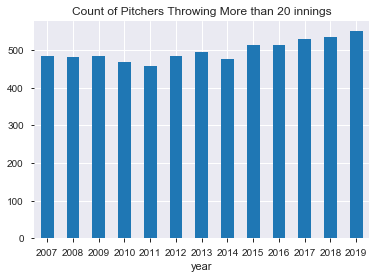

In [10]:
mean_players=all_that.groupby(['year']).mean()
sum_players=all_that.groupby(['year']).sum()
count_players=all_that.groupby(['year']).count()

ax = count_players['playerid'].plot.bar(x='Year', y='Count of Players', rot=0,title='Count of Pitchers Throwing More than 20 innings')

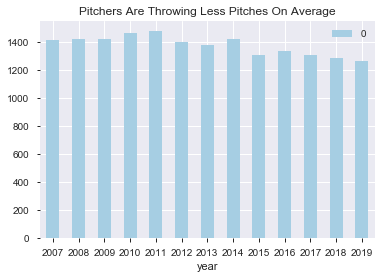

In [11]:

avg_pitches_thrown= pd.DataFrame(sum_players['Pitches']/count_players['playerid'])
avg_pitches_thrown.plot.bar( rot=0,title='Pitchers Are Throwing Less Pitches On Average', colormap='Paired')

In [12]:
#carlos marmol
all_that[all_that['playerid']==2790]

,Unnamed: 0,Age,playerid,BABIP_x,GB/FB,LD%,GB%,FB%_x,IFFB%,HR/FB,RS,RS/9,Balls,Strikes,Pitches,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,K/9,BB/9,K/BB,HR/9,K%,BB%,K-BB%,AVG,WHIP,LOB%,ERA-,FIP-,xFIP-,ERA_x,FIP,E-F,xFIP,SIERA,W,L,G,GS,CG,ShO,SV,HLD,BS,TBF,H,R,ER,HR,BB,IBB,HBP,WP,BK,SO,FB%_y,SL%,SLv,CT%,CTv,CB%,CBv,CH%,CHv,SF%,SFv,KN%,KNv,XX%,O-Swing%_x,Z-Swing%_x,Swing%_x,O-Contact%_x,Z-Contact%_x,Contact%_x,Zone%_x,F-Strike%,SwStr%,O-Swing%_y,Z-Swing%_y,Swing%_y,O-Contact%_y,Z-Contact%_y,Contact%_y,Zone%_y,Pace,vCH,vSL,vCS,FA-X,FC-X,FS-X,SI-X,CH-X,SL-X,CU-X,CS-X,KN-X,SB-X,IP,FA-Z,FC-Z,FS-Z,SI-Z,CH-Z,SL-Z,CU-Z,CS-Z,KN-Z,SB-Z,year,Days,Abdominal,Achilles,Ankle,Ankle/Back,Ankle/Elbow,Ankle/Knee,Arm,Arm/Back,Arm/Core,Arm/Elbow,Arm/Elbow Tommy John,Arm/Elbow Tommy John/Elbow,Arm/Elbow/Neck,Arm/Hamstring,Arm/Illness,Arm/Knee,Arm/Neck,Arm/Shoulder,Back,Back/Biceps,Back/Elbow,Back/Hamstring,Back/Pectoral,Back/Shoulder,Back/Toe,Biceps,Biceps/Arm,Biceps/Back,Biceps/Illness,Biceps/Shoulder,Buttocks,Calf,Calf/Hand,Concussion,Elbow,Elbow Tommy John,Elbow Tommy John/Elbow/Ankle,Elbow/Arm,Elbow/Back,Elbow/Biceps,Elbow/Hamstring,Elbow/Knee,Elbow/Oblique,Elbow/Shoulder,Elbow/Toe,Face,Finger,Finger/Knee/Shoulder,Finger/Ribs,Finger/Shoulder,Finger/Teeth,Foot,Foot/Elbow,Foot/Hamstring,Foot/Hip,Foot/Shoulder,Groin,Groin/Arm,Groin/Calf/Arm,Groin/Finger,Hamstring,Hamstring/Elbow,Hamstring/Oblique,Hamstring/Shoulder,Hand,Hand/Arm,Hand/Hamstring,Heart,Heel,Hip,Hip/Elbow,Hip/Elbow Tommy John,Hip/Groin,Hip/Shoulder,Illness,Illness/Abdominal,Illness/Finger,Knee,Knee ACL,Knee ACL/Elbow,Knee MCL,Knee/Elbow,Knee/Hip,Knee/Oblique,Knee/Shoulder,Knee/Thumb,Leg,Leg/Pectoral/Groin,Neck,Neck/Back,Neck/Chest,Neck/Elbow,Neck/Groin,Neck/Hamstring,Nose,Oblique,Oblique/Abdominal,Oblique/Back,Oblique/Biceps,Oblique/Groin,Oblique/Neck,Pectoral,Pectoral/Arm,Quad,Quad/Arm,Ribs,Ribs/Arm,Ribs/Knee,Ribs/Oblique,Ribs/Shoulder,Shin,Shin/Calf,Shoulder,Shoulder/Ankle,Shoulder/Arm,Shoulder/Back,Shoulder/Biceps,Shoulder/Elbow,Shoulder/Elbow Tommy John,Shoulder/Finger,Shoulder/Groin,Shoulder/Hamstring,Shoulder/Knee,Shoulder/Neck,Shoulder/Oblique,Shoulder/Oblique/Arm,Shoulder/Pectoral,Shoulder/Ribs,Shoulder/Thumb,Stomach,Thigh,Thumb,Toe,Toe/Finger,Ulnar Nerve,Undisclosed,Undisclosed/Elbow,Undisclosed/Hamstring,Wrist,Wrist/Elbow,Wrist/Hamstring,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,vFA_orig
4,4,24,2790,0.259,0.60,16.3 %,31.3 %,52.4 %,10.4 %,3.9 %,45,5.84,445,711,1156,43.3 %,32.7 %,24.0 %,25.3 %,50.0 %,24.7 %,12.46,4.54,2.74,0.39,33.7 %,12.3 %,21.4 %,0.167,1.10,91.0 %,31,59,79,1.43,2.72,-1.29,3.55,2.88,5,1,59,0,0,0,1,16,1,285,41,11,11,3,35,3,4,5,1,96,47.7 %,51.0 %,80.5,0,0.0,1.3 %,78.4,0,0.0,NaN,0.0,0,NaN,2.6 %,28.7 %,56.2 %,41.6 %,43.7 %,79.8 %,66.6 %,47.0 %,57.5 %,13.8 %,30.6 %,51.5 %,40.5 %,42.9 %,82.7 %,66.9 %,47.4 %,15.4,82.8,81.2,0.0,-6.5,0.0,0.0,0.0,-4.6,7.2,NaN,0.0,0.0,NaN,69.1,8.4,0.0,0.0,0.0,7.9,-2.0,0.0,0.0,0.0,NaN,2007,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,94.1
537,537,25,2790,0.169,0.62,9.9 %,34.6 %,55.5 %,14.9 %,9.9 %,43,4.43,580,929,1509,43.9 %,28.3 %,27.8 %,26.2 %,50.8 %,23.0 %,11.75,4.23,2.78,1.03,32.8 %,11.8 %,21.0 %,0.133,0.93,78.1 %,59,83,85,2.68,3.62,-0.94,3.66,2.82,2,4,82,0,0,0,7,30,2,348,40,30,26,10,41,3,6,6,1,114,48.2 %,51.9 %,81.9,0,0.0,0,0.0,0,0.0,NaN,0.0,0,NaN,1.6 %,22.6 %,53.4 %,38.2 %,49.1 %,82.8 %,73.0 %,50.7 %,49.1 %,10.3 %,22.4 %,52.2 %,38.1 %,56.2 %,80.5 %,73.7 %,52.8 %,20.3,0.0,82.3,0.0,-6.8,0.0,0.0,0.0,0.0,5.8,NaN,0.0,0.0,NaN,87.1,8.4,0.0,0.0,0.0,0.0,-2.3,0.0,0.0,0.0,NaN,2008,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [13]:
y_begin[y_begin['playerid']==2790]

,playerid,year,vFA,FBv
4,2790,2006,94.1,93.3
537,2790,2007,94.6,93.7
1082,2790,2008,94.9,94.0
1500,2790,2009,95.0,94.1
2177,2790,2010,92.6,91.8
2546,2790,2011,94.9,94.0
3208,2790,2012,94.6,93.7


In [14]:
test=y_begin.merge(all_that,on=['playerid','year'])

test=test.dropna(subset=['vFA'])

In [15]:
#next years velocity
#remember we nees to add  back in prior year velocity as a predictor
labels=test[['playerid','year']]
y=test[['vFA','playerid','year']]
X=test.drop(['playerid','year','vFA','FBv'],axis=1)

In [16]:
percent=['LD%','GB%','FB%_x','IFFB%','HR/FB','Pull%','Cent%','Oppo%','Soft%','Med%','Hard%','K%','BB%','K-BB%',
'LOB%','FB%_y','SL%','CT%','CB%','CH%','SF%','KN%','XX%','O-Swing%_x','Z-Swing%_x',
'Swing%_x','O-Contact%_x','Z-Contact%_x','Contact%_x','Zone%_x','F-Strike%','SwStr%','O-Swing%_y','Z-Swing%_y','Swing%_y','O-Contact%_y','Z-Contact%_y',
'Contact%_y','Zone%_y']
for name in percent:
    X[name]=X[name].str.strip('%')

X[percent]=X[percent].apply(pd.to_numeric)
X[percent]=X[percent]/100

X['CT%']=X['CT%'].fillna(0)

X['CT%'] = X['CT%'].fillna(0)
X['SF%'] = X['SF%'].fillna(0)
X['KN%'] = X['KN%'].fillna(0)
X['KNv'] = X['KNv'].fillna(0)
X['SB-Z'] = X['SB-Z'].fillna(0)
X['CB%'] = X['CB%'].fillna(0)
X['SB-X'] = X['SB-X'].fillna(0)
X['CU-X'] = X['CU-X'].fillna(0)

X['FA-Z'] = X['FA-Z'].fillna(0)
X['SL%'] = X['SL%'].fillna(0)
X['CH%'] = X['CH%'].fillna(0)
X['XX%'] = X['XX%'].fillna(0) 
X['FA-X'] = X['FA-X'].fillna(0)

X['O-Swing%_y'] = X['O-Swing%_y'].fillna(0)
X['Z-Swing%_y'] = X['Z-Swing%_y'].fillna(0)
X['Swing%_y'] = X['Swing%_y'].fillna(0)
X['O-Contact%_y'] = X['O-Contact%_y'].fillna(0) 
X['Z-Contact%_y'] = X['Z-Contact%_y'].fillna(0)

X['Contact%_y'] = X['Contact%_y'].fillna(0) 
X['Zone%_y'] = X['Zone%_y'].fillna(0)
X=X.fillna(0)
X=X.round(10)

X.head()

X['starter?']=X['GS']/X['G']
X['starter?']=X['starter?'].apply(lambda x: 1 if x > .5 else 0)

X_Regression=X
X_Neural=X

#feature engineering for X that is not the regression model
#maybe throwing more offspeed pitches deteriorates an arm quicker
X_Neural['numberofSL']=X_Neural['SL%']*X_Neural['Pitches']
X_Neural['numberofFB']=X_Neural['FB%_y']*X_Neural['Pitches']
X_Neural['numberofCT']=X_Neural['CT%']*X_Neural['Pitches']
X_Neural['numberofCB']=X_Neural['CB%']*X_Neural['Pitches']
X_Neural['numberofCH']=X_Neural['CH%']*X_Neural['Pitches']
X_Neural['numberofSF']=X_Neural['SF%']*X_Neural['Pitches']

#dropping highly correlated columns nd columns that dont make sense.  Leaving in these same columns for neural net
X_Regression=X_Regression.drop(['FB%_x','xFIP-','FIP-','W','L','RS','RS/9'],axis=1)

In [17]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

X_train, X_test, y_train, y_test = train_test_split(X_Regression, y, test_size=0.20, random_state=42)

In [18]:
y_train_labels=y_train[['year','playerid']]
y_test_labels=y_test[['year','playerid']]
y_train=y_train['vFA']


In [195]:
type(CD)

pandas.core.frame.DataFrame

In [19]:
#X.isnull().sum()
from sklearn import preprocessing
normalized_X_train = preprocessing.normalize(X_train)
normalized_X_test = preprocessing.normalize(X_test)

In [20]:
regressor = LinearRegression()  
regressor.fit(normalized_X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
y_pred = regressor.predict(normalized_X_test)

In [22]:
y_test_labels=y_test_labels.reset_index()
y_test_1=y_test.reset_index()
all_test_data = pd.DataFrame(columns=['year'])
all_test_data['year']=y_test_labels['year']
all_test_data['playerid']=y_test_labels['playerid']
all_test_data['predictions']=pd.DataFrame(y_pred)
all_test_data['Actuals']=y_test_1['vFA']


In [23]:
all_test_data.head()

,year,playerid,predictions,Actuals
0,2016,6893,92.820682,91.6
1,2007,512,93.919448,95.2
2,2013,6345,93.880762,95.8
3,2014,4971,93.075397,91.3
4,2016,1841,92.417862,93.8


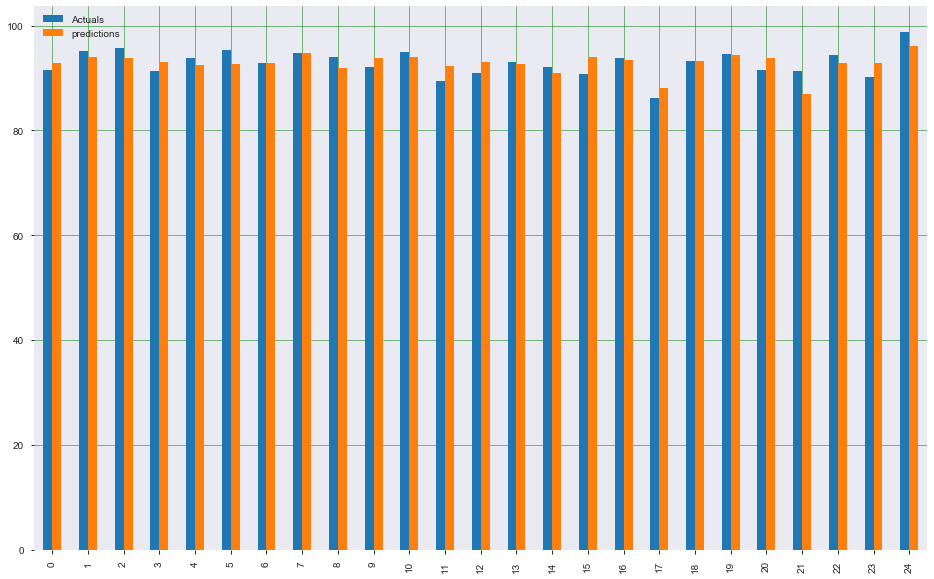

In [24]:
df1 = all_test_data[['Actuals','predictions']].head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [25]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_1['vFA'].values, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_1['vFA'].values, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_1['vFA'].values, y_pred)))

Mean Absolute Error: 1.5932265441953726
Mean Squared Error: 4.614826233366828
Root Mean Squared Error: 2.1482146618452327


In [26]:
#coefs=pd.DataFrame(dict(zip(X_Regression.columns,regressor.coef_[0])),index=[0]).T

In [27]:
#importance=coefs.sort_values([0])

In [28]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1400,  min_samples_split= 2,
 min_samples_leaf= 1,
 max_features= 'auto',
 max_depth= 100,
 bootstrap=True,random_state = 42)# Train the model on training data
rf.fit(X_train, y_train)

#rf_random.best_params_

#{'n_estimators': 1400,
# 'min_samples_split': 2,
# 'min_samples_leaf': 1,
# 'max_features': 'auto',
# 'max_depth': 100,
# 'bootstrap': True}

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1400,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [29]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)# Calculate the absolute errors
errors = abs(predictions - y_test['vFA'].values)# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.8


In [30]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test['vFA'].values)# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.13 %.


In [31]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test['vFA'], predictions))#y_pred))
print("RMSE: %f" % (rmse))

RMSE: 1.086814


In [32]:

#y_test_labels=y_test_labels.reset_index()
y_test_1=y_test.reset_index()
all_test_data_rf = pd.DataFrame(columns=['year'])
all_test_data_rf['year']=y_test_labels['year']
all_test_data_rf['playerid']=y_test_labels['playerid']
all_test_data_rf['predictions']=pd.DataFrame(predictions)
all_test_data_rf['Actuals']=y_test_1['vFA']

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (7,7)

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.layers import Dropout

Using TensorFlow backend.


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_Neural, y, test_size=0.20, random_state=52)

In [35]:
#create model
n_cols = X_train.shape[1]
model_mc = Sequential()

#add model layers
model_mc.add(Dense(500, activation='relu', input_shape=(n_cols,)))
model_mc.add(Dense(100, activation='relu'))
#model_mc.add(Dropout(0.25))
model_mc.add(Dense(50,activation='relu'))
model_mc.add(Dense(100,activation='relu'))
model_mc.add(Dense(200,activation='relu'))
model_mc.add(Dense(250, activation='relu'))
model_mc.add(Dense(1))

#compile model using mse as a measure of model performance
model_mc.compile(optimizer='adam', loss='mean_squared_error')

In [36]:
y_train=y_train['vFA']

In [37]:
predictions=model_mc.predict(X_test).flatten()

In [39]:
from numpy import loadtxt
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [40]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = .5, learning_rate = 0.2, max_depth = 6, 
                          alpha = 15, n_estimators = 50)
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

In [41]:
rmse = np.sqrt(mean_squared_error(y_test['vFA'], preds))#y_pred))
print("RMSE: %f" % (rmse))
#RMSE: 1.01

RMSE: 1.074494


In [42]:
#y_test_labels=y_test_labels.reset_index()
y_test_1=y_test.reset_index()
all_test_data_3 = pd.DataFrame(columns=['year'])
all_test_data_3['year']=y_test_labels['year']
all_test_data_3['playerid']=y_test_labels['playerid']
all_test_data_3['predictions']=pd.DataFrame(preds)
all_test_data_3['Actuals']=y_test_1['vFA']

In [43]:
all_test_data_3.head()

,year,playerid,predictions,Actuals
0,2016,6893,94.709633,95.4
1,2007,512,95.258499,94.5
2,2013,6345,93.220764,92.3
3,2014,4971,93.086082,92.2
4,2016,1841,93.655853,93.9


In [44]:
#print(all_test_data)
#print(all_test_data_2)
#print(all_test_data_3)
#print(all_test_data_rf)


In [45]:
from sklearn.ensemble import VotingRegressor#create a dictionary of our models
estimators=[('rf', rf), ('xgboost', xg_reg)]#create our voting classifier, inputting our models
ensemble = VotingRegressor(estimators)

In [46]:
#fit model to training data
e = ensemble.fit(X_train, y_train)#test our model on the test data

In [47]:
ensemblepreds=e.predict(X_test)
ensemble.score(X_test, y_test['vFA'])
rmse = np.sqrt(mean_squared_error(y_test['vFA'], ensemblepreds))#y_pred))
print("RMSE: %f" % (rmse))
#slightly worse rmse than RF of 1.117 with all 3
#without reg regression its ~1

RMSE: 1.013472


In [48]:
#y_test_1=y_test.reset_index()
all_test_ensem = pd.DataFrame(columns=['year'])
all_test_ensem['year']=y_test_labels['year']
all_test_ensem['playerid']=y_test_labels['playerid']
all_test_ensem['predictions']=pd.DataFrame(ensemblepreds)
all_test_ensem['Actuals']=y_test_1['vFA']

In [49]:
all_test_ensem.to_csv('FinalResults.csv')

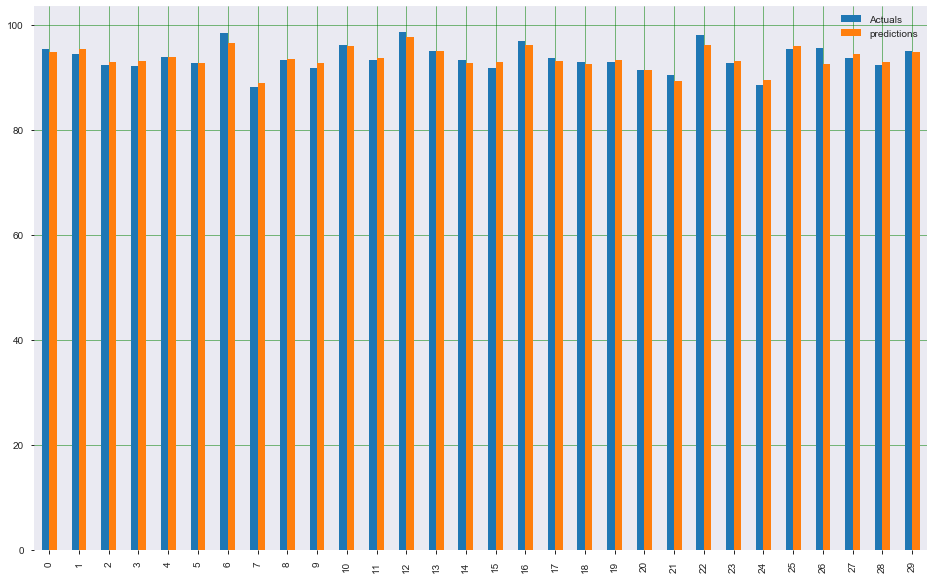

In [50]:
df2 = all_test_ensem[['Actuals','predictions']].head(30)
df2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

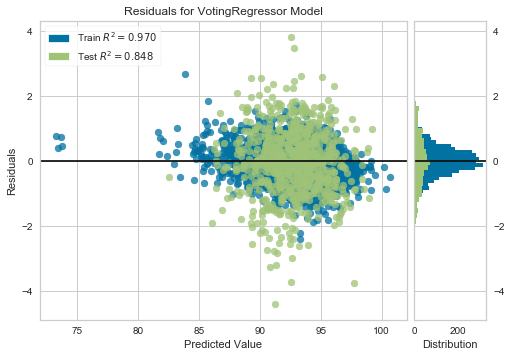

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(ensemble)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test['vFA'])  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

Takeaways, explanation and improvements

1)Plot of residuals(above) versus predicted values and plot of distribution of residuals.

My model looks to be slightly overfit(difference in r squared for train/test and larger range of test residuals) but fortunately my residuals look relatively normally distributed and my train/test rmse is good.The residuals looks to be fairly even in terms of distribution of + and - residuals. There is also no clear pattern in my residuals which is a positive. Obviously the majority of residuals sit around the average velocity as that is where the most data is generated. image.png

2) The uses of the model are two fold.

A) Identify pitchers that are targets to be velocity bounceback candidates. Pitchers that had a sudden dip in velocity but their underlying characteristics highlight them as pitchers that could regress to closer to career averages. Potential buy low candidates if it is assessed that a lot of a player's loss in value was due to a velocity issue. For 2020 predictions the largest gains in velocity involved quite a few relievers that have been volatile.

B) Identify pitchers who are candidates for a falloff. Whether this is a FA, potential trade acquisition, or an internal player. I see this being especially useful for veteran pitchers who may be signed to short term contracts and relievers who can be notoriously volatile. For example for 2020 my model believes one veteran reliever will lose nearly 1.75 mph off his fastball, so if he were theoretically a FA or potential trade target(which I don't think he would be much of either currently) it's something to take into account.

While velocity is certainly not an end all be all for pitchers, it is certainly where the game has headed. Being able to predict something smaller and more targeted is typically easier and could add to a pitcher's profile.

3) Before I get to specific examples, in general the model needs more data. A lot of the more advanced data I could get my hands on only went back to 2007 so instead of dealing with a whole bunch of N/A values I stopped the data at that point. Also there is the fact that training, nutrition and fitness have never been better in the game so going back too far could throw off the model.

Major Outliers A) Joel Hanhrahan(2007 to Predict 2008) Fangraphs ID- 2186 Prediction-91.2046 Actual-95.6

Zack Britton(2013 to Predict 2014) Fangraphs ID- 3240 Prediction-92.5731 Actual-96.3 Reason for inaccuracy-In 2007 Hanhrahan threw the majority of his innings as a starter and was career starter in the minor leagues. Coming off a 1st year as a starter, Hanhrahan was moved to the bullpen for the Nationals. The model predicted a slight jump in Britton's velocity but not nearly the jump that Britton made as Britton moved from a young starter to a reliever

Model improvement-Add a dummy variable to account for a change from a reliever or a starter and vice versa. Clearly, moving to the bullpen played some role in Hanrahans uptick in velocity and the model would need to take this into account if this is something being planned for a player in the future.

B) Jordan Hicks(2018 to Predict 2019) Fangraphs ID- 19618 Prediction-97.76 Actual-101.5

Reason for inaccuracy-The model simply does not have enough data for players that have thrown above 100 mph and does not enough past data for Hicks.

Model improvement-First, get all the minor league data possible on Hicks and add it to the model. Reading up on Hicks it seems his velocity took off while he was playing at Peoria, inserting that jump year into the model can only help as it increases the data on 100 mph pitchers. Additionally, it would help to add something like average velocity over the past 3 years or YoY change in velocity to allow the model to account for player trends over longer periods. Career stats to date would also be a major help.


In [212]:
A=pd.read_csv('Advanced 2019.csv')
B=pd.read_csv('Age 2019.csv')
C=pd.read_csv('Batted Balls 2019.csv')
D=pd.read_csv('H movement 2019.csv')
E=pd.read_csv('Pitch Type 2019.csv')
F=pd.read_csv('plate discipline 2 2019.csv')
G=pd.read_csv('plate discipline 2019.csv')
H=pd.read_csv('Standard 2019.csv')
I=pd.read_csv('Velocity 2019.csv')
J=pd.read_csv('vertical 2019.csv')

B=B.drop(['Name'],axis=1)
C=C.drop(['Name'],axis=1)
D=D.drop(['Name'],axis=1)
E=E.drop(['Name'],axis=1)
F=F.drop(['Name'],axis=1)
G=G.drop(['Name'],axis=1)
H=H.drop(['Name'],axis=1)
I=I.drop(['Name'],axis=1)
J=J.drop(['Name'],axis=1)

AB=A.merge(B,on='playerid')
ABC=AB.merge(C,on='playerid')
CD=ABC.merge(D,on='playerid')
CD=CD.merge(E,on='playerid')
CD=CD.merge(F,on='playerid')
CD=CD.merge(G,on='playerid')
CD=CD.merge(H,on='playerid')
CD=CD.merge(I,on='playerid')
CD=CD.merge(J,on='playerid')

In [213]:
K=injury[injury['year']==2019]
CD=CD.merge(K,on='Name')

y_begin=CD[['playerid','year','vFA','FBv']]


# use pd.concat to join the new columns with your original dataframe
CD = pd.concat([CD,pd.get_dummies(CD['Injury Type'])],axis=1)

# now drop the original 'country' column (you don't need it anymore)
CD.drop(['Injury Type'],axis=1, inplace=True)

# use pd.concat to join the new columns with your original dataframe
CD = pd.concat([CD,pd.get_dummies(CD['year'])],axis=1)


CD['vFA_orig']=CD['vFA']
CD=CD.drop(['IL Money','IL Type','Name','FBv','Team','vCU','vFA','vFC','vFS','vKN','vSB','vSI'],axis=1)

#not doing this as a loop in case so i cant evaluate each going forward
CD['CB%'] = CD['CB%'].fillna(0)
CD['CBv'] = CD['CBv'].fillna(0)
CD['CH%'] = CD['CH%'].fillna(0)
CD['CH-X'] = CD['CH-X'].fillna(0)

CD['CH-Z'] = CD['CH-Z'].fillna(0)
CD['CHv'] = CD['CHv'].fillna(0)
CD['CS-X'] = CD['CS-X'].fillna(0)
CD['CS-Z'] = CD['CS-Z'].fillna(0)


CD['CT%'] = CD['CT%'].fillna(0)
CD['CTv'] = CD['CTv'].fillna(0)
CD['CU-Z'] = CD['CU-Z'].fillna(0)
CD['Days'] = CD['Days'].fillna(0)


CD['ER'] = CD['ER'].fillna(0)
CD['FB%_x'] = CD['FB%_x'].fillna(0)
CD['FB%_y'] = CD['FB%_y'].fillna(0)


CD['FC-X'] = CD['FC-X'].fillna(0)
CD['FC-Z'] = CD['FC-Z'].fillna(0)
CD['FS-X'] = CD['FS-X'].fillna(0)

CD['FS-Z'] = CD['FS-Z'].fillna(0)
CD['GB%'] = CD['GB%'].fillna(0)
CD['GB/FB'] = CD['GB/FB'].fillna(0)


CD['KN%'] = CD['KN%'].fillna(0)
CD['KN-X'] = CD['KN-X'].fillna(0)
CD['KN-Z'] = CD['KN-Z'].fillna(0)


CD['O-Contact%_y'] = CD['O-Contact%_y'].fillna(0)
CD['O-Swing%_y'] = CD['O-Swing%_y'].fillna(0)
CD['SFv'] = CD['SFv'].fillna(0)
CD['SI-X'] = CD['SI-X'].fillna(0)
CD['SI-Z'] = CD['SI-Z'].fillna(0)
CD['SL%'] = CD['SL%'].fillna(0)
CD['SL-X'] = CD['SL-X'].fillna(0)
CD['SL-Z'] = CD['SL-Z'].fillna(0)
CD['SLv'] = CD['SLv'].fillna(0)

CD['Swing%_y'] = CD['Swing%_y'].fillna(0)
CD['vCS'] = CD['vCS'].fillna(0)
CD['vCH'] = CD['vCH'].fillna(0)
CD['vSL'] = CD['vSL'].fillna(0)
CD['XX%'] = CD['XX%'].fillna(0)
CD['Z-Contact%_y'] = CD['Z-Contact%_y'].fillna(0)
CD['Z-Swing%_y'] = CD['Z-Swing%_y'].fillna(0)
CD['Zone%_y'] = CD['Zone%_y'].fillna(0)


#lagging the data and remerging it to create my test data set since n
#y_begin['year']=y_begin['year']

In [214]:

CD[['LD%','GB%','FB%_x','IFFB%','HR/FB','Pull%','Cent%','Oppo%','Soft%','Med%','Hard%','K%','BB%','K-BB%','LOB%','FB%_y','SL%','CT%','CB%','CH%','SF%','KN%','XX%','O-Swing%_x','Z-Swing%_x','Swing%_x','O-Contact%_x','Z-Contact%_x','Contact%_x','Zone%_x','F-Strike%','SwStr%','O-Swing%_y','Z-Swing%_y','Swing%_y','O-Contact%_y','Z-Contact%_y','Contact%_y','Zone%_y']].dtypes

LD%              object
GB%              object
FB%_x            object
IFFB%            object
HR/FB            object
Pull%            object
Cent%            object
Oppo%            object
Soft%            object
Med%             object
Hard%            object
K%               object
BB%              object
K-BB%            object
LOB%             object
FB%_y            object
SL%              object
CT%              object
CB%              object
CH%              object
SF%              object
KN%             float64
XX%              object
O-Swing%_x       object
Z-Swing%_x       object
Swing%_x         object
O-Contact%_x     object
Z-Contact%_x     object
Contact%_x       object
Zone%_x          object
F-Strike%        object
SwStr%           object
O-Swing%_y       object
Z-Swing%_y       object
Swing%_y         object
O-Contact%_y     object
Z-Contact%_y     object
Contact%_y       object
Zone%_y          object
dtype: object

In [215]:
percent=['LD%','GB%','FB%_x','IFFB%','HR/FB','Pull%','Cent%','Oppo%','Soft%','Med%','Hard%','K%','BB%','K-BB%',
'LOB%','FB%_y','SL%','CT%','CB%','CH%','SF%','XX%','O-Swing%_x','Z-Swing%_x',
'Swing%_x','O-Contact%_x','Z-Contact%_x','Contact%_x','Zone%_x','F-Strike%','SwStr%','O-Swing%_y','Z-Swing%_y','Swing%_y','O-Contact%_y','Z-Contact%_y',
'Contact%_y','Zone%_y']
for name in percent:
    CD[name]=CD[name].str.strip('%')

CD[percent]=CD[percent].apply(pd.to_numeric)
CD[percent]=CD[percent]/100

CD['CT%'] = CD['CT%'].fillna(0)
CD['SF%'] = CD['SF%'].fillna(0)
CD['KN%'] = CD['KN%'].fillna(0)
CD['KNv'] = CD['KNv'].fillna(0)
CD['SB-Z'] = CD['SB-Z'].fillna(0)
CD['CB%'] = CD['CB%'].fillna(0)
CD['SB-X'] = CD['SB-X'].fillna(0)
CD['CU-X'] = CD['CU-X'].fillna(0)

CD['FA-Z'] = CD['FA-Z'].fillna(0)
CD['SL%'] = CD['SL%'].fillna(0)
CD['CH%'] = CD['CH%'].fillna(0)
CD['XX%'] = CD['XX%'].fillna(0) 
CD['FA-X'] = CD['FA-X'].fillna(0)

CD['O-Swing%_y'] = CD['O-Swing%_y'].fillna(0)
CD['Z-Swing%_y'] = CD['Z-Swing%_y'].fillna(0)
CD['Swing%_y'] = CD['Swing%_y'].fillna(0)
CD['O-Contact%_y'] = CD['O-Contact%_y'].fillna(0) 
CD['Z-Contact%_y'] = CD['Z-Contact%_y'].fillna(0)

CD['Contact%_y'] = CD['Contact%_y'].fillna(0) 
CD['Zone%_y'] = CD['Zone%_y'].fillna(0)
CD=CD.fillna(0)
CD=CD.round(10)




In [216]:
colis=['Oblique/Abdominal', 'Knee/Oblique', 'Biceps/Arm', 'Shoulder/Finger', 'Ankle/Knee', 'Knee/Thumb', 'Oblique/Neck', 'Hip/Elbow', 'Arm/Elbow', 'Finger/Ribs', 'Ribs/Shoulder', 'Foot/Hip', 'Arm/Neck', 'Unnamed: 0', 'Leg', 'Quad', 'Hand/Hamstring', 'Elbow/Back', 'Neck/Hamstring', 'Back/Biceps', 'Hamstring/Elbow', 'Elbow/Biceps', 'Hip/Groin', 'Shoulder/Oblique/Arm', 'Neck/Back', 'Back/Pectoral', 'Toe', 'Groin/Arm', 'Finger/Knee/Shoulder', 'Shoulder/Back', 'Hand', 'Shoulder/Oblique', 'Illness/Abdominal', 'Oblique/Groin', 'Pectoral/Arm', 'Neck', 'Wrist/Hamstring', 'Ribs/Arm', 'Finger/Shoulder', 'Shoulder/Ribs', 'Neck/Elbow', 'Foot/Hamstring', 'Oblique/Biceps', 'Shoulder/Ankle', 'Arm/Core', 'Thumb', 'Foot/Elbow', 'Elbow Tommy John/Elbow/Ankle', 'Knee ACL/Elbow', 'Ribs', 'Buttocks', 'Shoulder/Elbow Tommy John', 'Knee/Hip', 'Nose', 'Hip/Elbow Tommy John', 'Knee MCL', 'Shoulder/Knee', 'Ankle/Elbow', 'Arm/Back', 'Illness/Finger', 'Biceps/Back', 'Arm/Elbow/Neck', 'Knee/Shoulder', 'Elbow/Hamstring', 'Back/Toe', 'Knee/Elbow', 'Shoulder/Hamstring', 'Shin/Calf', 'Leg/Pectoral/Groin', 'Arm/Shoulder', 'Back/Hamstring', 'Heart', 'Shoulder/Biceps', 2007, 2008, 2009, 2010, 'Face', 'Ulnar Nerve', 2014, 2011, 'Neck/Chest', 2017, 2018, 'Groin/Calf/Arm', 2012, 2013, 2015, 2016, 'Calf/Hand', 'Ribs/Knee', 'Shoulder/Pectoral', 'Arm/Elbow Tommy John', 'Arm/Elbow Tommy John/Elbow']


for name in colis:
    CD[name] = 0
    

In [217]:
#CD=CD.drop(['IP_y','ERA_y','BABIP_y','IP_x'],axis=1)

In [218]:
hold=CD['playerid']
CD=CD.drop(['playerid','year'],axis=1)

In [219]:
CD['numberofSL']=CD['SL%']*CD['Pitches']
CD['numberofFB']=CD['FB%_y']*CD['Pitches']
CD['numberofCT']=CD['CT%']*CD['Pitches']
CD['numberofCB']=CD['CB%']*CD['Pitches']
CD['numberofCH']=CD['CH%']*CD['Pitches']
CD['numberofSF']=CD['SF%']*CD['Pitches']

CD['starter?']=CD['GS']/CD['G']
CD['starter?']=CD['starter?'].apply(lambda x: 1 if x > .5 else 0)


In [220]:
CD=CD[X_Neural.columns]

In [223]:
predy=e.predict(CD)

In [236]:
#y_test_1=y_test.reset_index()
all_testy= pd.DataFrame(columns=['playerid'])
all_testy['playerid']=hold[0:]
all_testy['predictions']=pd.DataFrame(predy)
all_testy['lastyearFB']=CD['vFA_orig']

#high dimensionality. Data wider than longer
#more dimensions means points get blown to surface and it becomes harder to predict. So bring down dimensions with PCA etc

In [240]:
all_testy['difference']=all_testy['predictions']-all_testy['lastyearFB']
all_testy.to_csv('2020.csv')